In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

/Users/atsushi.hara/.anyenv/envs/pyenv/versions/anaconda3-5.0.1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/atsushi.hara/.anyenv/envs/pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sess = tf.Session()

In [3]:
# Load iris dataset
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [4]:
# Parameters
batch_size = 25
learning_rate = 0.1
iterations = 200

In [5]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
model_output = tf.add(tf.matmul(x_data, A), b)

# L1 loss function
loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))

init = tf.global_variables_initializer()
sess.run(init)

opt_l1 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step_l1 = opt_l1.minimize(loss_l1)

loss_vec_l1 = []

for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    fd = {
        x_data: rand_x,
        y_target: rand_y
    }
    sess.run(train_step_l1, feed_dict=fd)
    temp_loss_l1 = sess.run(loss_l1, feed_dict=fd)
    loss_vec_l1.append(temp_loss_l1)
    
    if (i+1)%25==0:
        print('Step #{} A = {}, b = {}'.format((i+1), sess.run(A), sess.run(b)))

Step #25 A = [[2.7930877]], b = [[0.99924]]
Step #50 A = [[2.7306876]], b = [[1.92324]]
Step #75 A = [[2.332288]], b = [[2.6712399]]
Step #100 A = [[1.8318877]], b = [[3.2832403]]
Step #125 A = [[1.5094877]], b = [[3.9352407]]
Step #150 A = [[1.1114875]], b = [[4.411241]]
Step #175 A = [[0.89428747]], b = [[4.70324]]
Step #200 A = [[0.7834873]], b = [[4.75524]]


In [6]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [7]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
model_output = tf.add(tf.matmul(x_data, A), b)

# L1 loss function
loss_l2 = tf.reduce_mean(tf.square(y_target - model_output))

init = tf.global_variables_initializer()
sess.run(init)

opt_l2 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step_l2 = opt_l2.minimize(loss_l2)

loss_vec_l2 = []

for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    fd = {
        x_data: rand_x,
        y_target: rand_y
    }
    sess.run(train_step_l2, feed_dict=fd)
    temp_loss_l2 = sess.run(loss_l2, feed_dict=fd)
    loss_vec_l2.append(temp_loss_l2)
    
    if (i+1)%25==0:
        print('Step #{} A = {}, b = {}'.format((i+1), sess.run(A), sess.run(b)))

Step #25 A = [[1.4237196]], b = [[4.068041]]
Step #50 A = [[1.1718546]], b = [[4.559757]]
Step #75 A = [[0.9665173]], b = [[4.7116184]]
Step #100 A = [[0.925829]], b = [[4.7771697]]
Step #125 A = [[0.92632073]], b = [[4.758811]]
Step #150 A = [[0.8974301]], b = [[4.7593064]]
Step #175 A = [[0.8765196]], b = [[4.764374]]
Step #200 A = [[0.86002266]], b = [[4.7651534]]


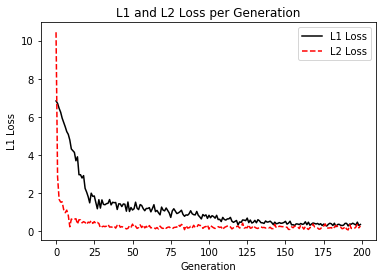

In [8]:
plt.plot(loss_vec_l1, 'k-', label='L1 Loss')
plt.plot(loss_vec_l2, 'r--', label='L2 Loss')

plt.title('L1 and L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L1 Loss')
plt.legend(loc='upper right')

plt.show()